# import libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Loading
The dataset is imported from the data source and stored in a DataFrame.
This step is required before performing any preprocessing, analysis, or modeling.


In [137]:
df=pd.read_csv(r"C:\Users\zuz12\OneDrive\Desktop\pa project new\german_credit_data.csv")

In [138]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


# preprocessing

# drop unused columns

In [139]:
df=df.drop("Unnamed: 0",axis=1)

# check null values

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [141]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

# check duplicates

In [142]:
df.duplicated().sum()

np.int64(0)

# check inconsistence data

In [143]:
df["Sex"].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

In [144]:
df["Housing"].value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [145]:
df['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [146]:
df['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [147]:
df['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

# select null columns

In [148]:
null_col=[]

In [149]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        null_col.append(i)

In [150]:
null_col

['Saving accounts', 'Checking account']

# selecting numeric columns

In [151]:
num_col=df.select_dtypes(include=np.number).columns

# check outliers

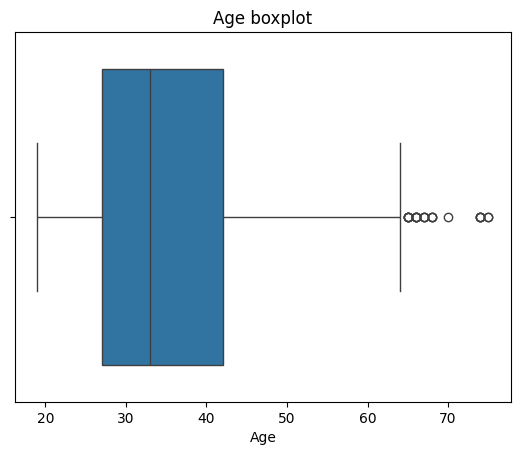

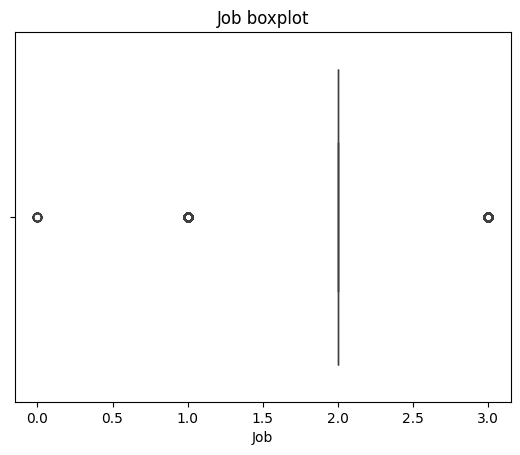

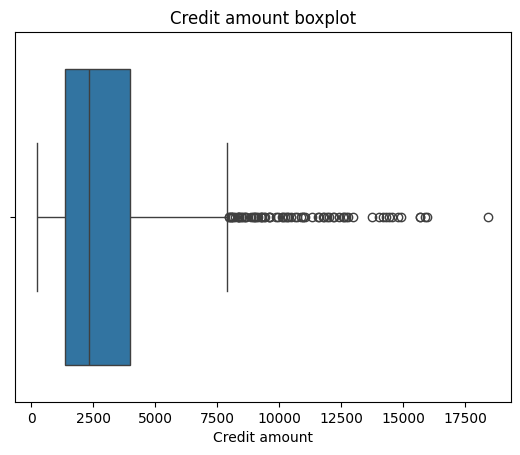

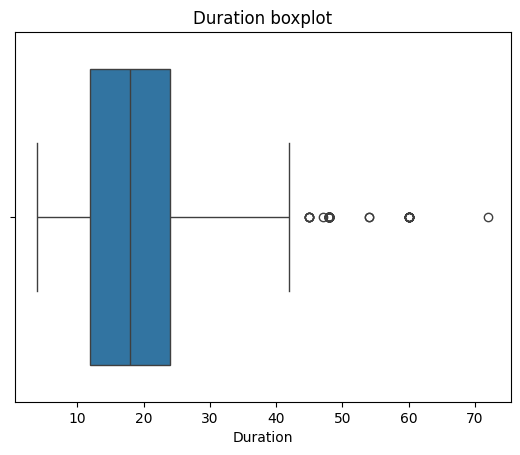

In [152]:
for i in num_col:
    sns.boxplot(x=i,data=df)
    plt.title(f"{i} boxplot")    
    plt.show()

# checking distribution of numeric columns

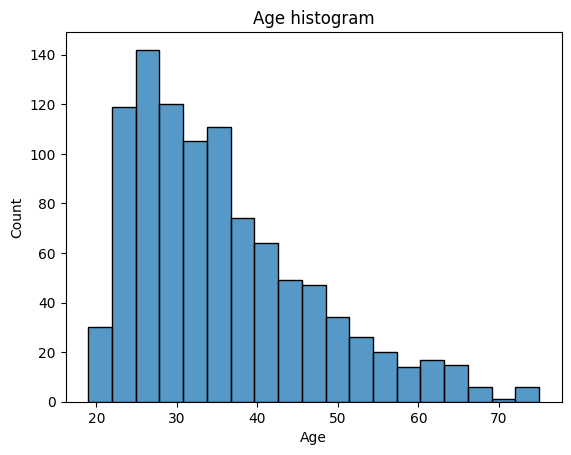

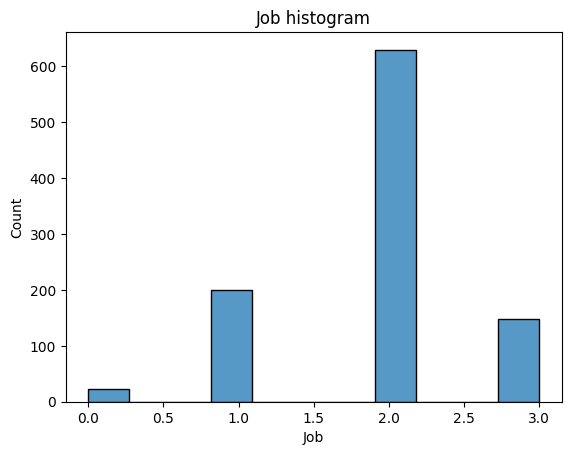

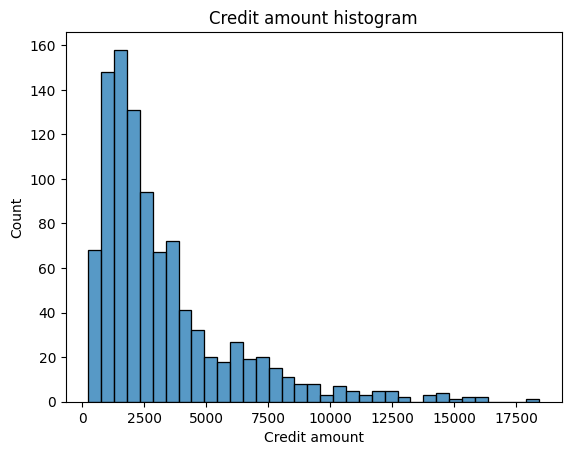

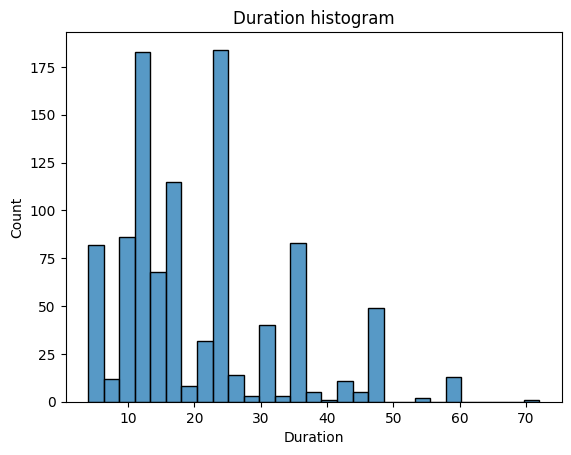

In [153]:
for i in num_col:
    sns.histplot(df[i])
    plt.title(f"{i} histogram")
    plt.show()

# Make some transformations

In [154]:
df["Age"]=np.log(df["Age"]+1)

In [155]:
df["Credit amount"]=np.log(df["Credit amount"]+1)

In [156]:
df["Duration"]=np.log(df["Duration"]+1)

# Checking the columns after transformation

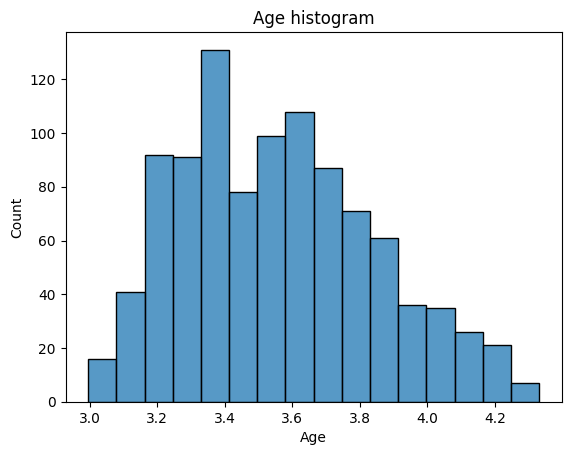

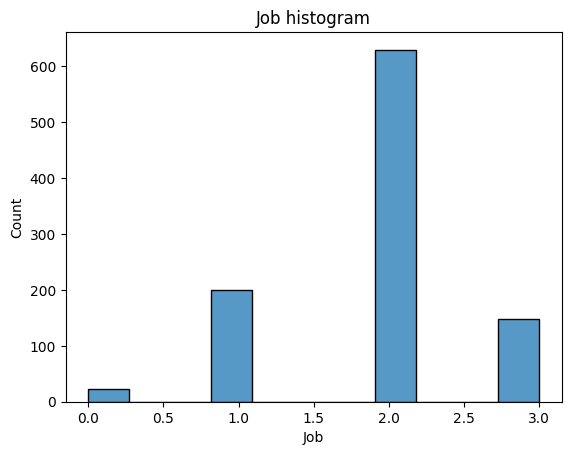

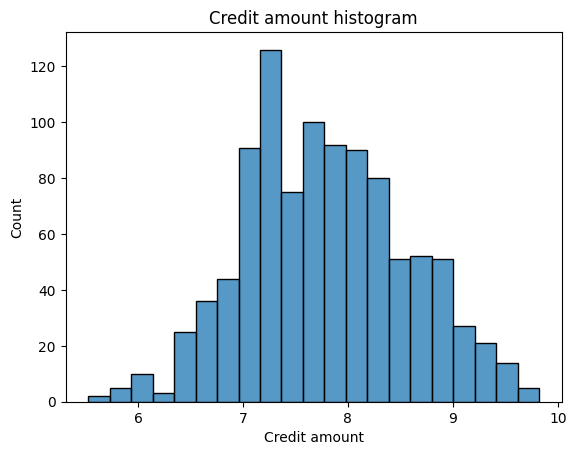

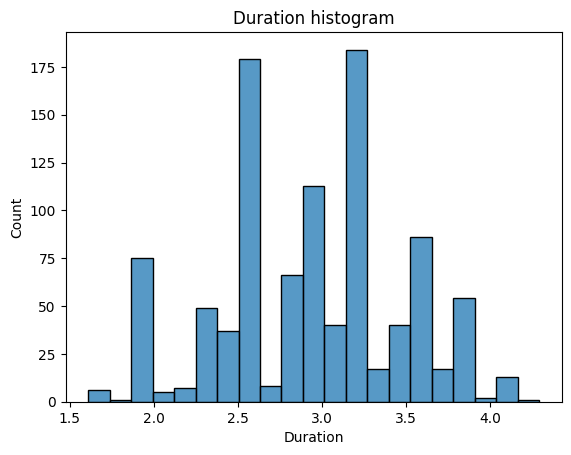

In [157]:
for i in num_col:
    sns.histplot(df[i])
    plt.title(f"{i} histogram")
    plt.show()

# selecting categorical variables for encoding

In [158]:
ohe_col=["Purpose","Housing"]

In [159]:
df["Sex"] = df["Sex"].replace({
    "male": 1,
    "female": 0
})


C:\Users\zuz12\AppData\Local\Temp\ipykernel_19960\4268997093.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({


In [160]:
df["Saving accounts"] = df["Saving accounts"].replace({
    "little": 0,
    "moderate": 1,
    "quite rich": 2,
    "rich": 3
})


C:\Users\zuz12\AppData\Local\Temp\ipykernel_19960\2208184055.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Saving accounts"] = df["Saving accounts"].replace({


In [161]:
df["Checking account"] = df["Checking account"].replace({
    "little": 0,
    "moderate": 1,
    "rich": 2
})


C:\Users\zuz12\AppData\Local\Temp\ipykernel_19960\2960368025.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Checking account"] = df["Checking account"].replace({


In [162]:
df=pd.get_dummies(data=df,columns=ohe_col)

In [163]:
df

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Housing_free,Housing_own,Housing_rent
0,4.219508,1,2,NaN,0.0,7.064759,1.945910,False,False,False,False,False,True,False,False,False,True,False
1,3.135494,0,2,0.0,1.0,8.691483,3.891820,False,False,False,False,False,True,False,False,False,True,False
2,3.912023,1,1,0.0,NaN,7.648263,2.564949,False,False,False,True,False,False,False,False,False,True,False
3,3.828641,1,2,0.0,0.0,8.972464,3.761200,False,False,False,False,True,False,False,False,True,False,False
4,3.988984,1,2,0.0,0.0,8.491055,3.218876,False,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.465736,0,1,0.0,NaN,7.459915,2.564949,False,False,False,False,True,False,False,False,False,True,False
996,3.713572,1,3,0.0,0.0,8.257904,3.433987,False,True,False,False,False,False,False,False,False,True,False
997,3.663562,1,2,0.0,NaN,6.690842,2.564949,False,False,False,False,False,True,False,False,False,True,False
998,3.178054,1,2,0.0,0.0,7.520776,3.828641,False,False,False,False,False,True,False,False,True,False,False


# Impute missing values

In [164]:
from sklearn.impute import SimpleImputer    

In [165]:
imputer=SimpleImputer(strategy="most_frequent")

In [166]:
df[null_col]=imputer.fit_transform(df[null_col])

In [167]:
df.isnull().sum()

Age                            0
Sex                            0
Job                            0
Saving accounts                0
Checking account               0
Credit amount                  0
Duration                       0
Purpose_business               0
Purpose_car                    0
Purpose_domestic appliances    0
Purpose_education              0
Purpose_furniture/equipment    0
Purpose_radio/TV               0
Purpose_repairs                0
Purpose_vacation/others        0
Housing_free                   0
Housing_own                    0
Housing_rent                   0
dtype: int64

# scaling features

In [168]:
scale_col=["Age","Credit amount","Duration"]

In [169]:
from sklearn.preprocessing import StandardScaler

In [170]:
scaler=StandardScaler()

In [171]:
df[scale_col]=scaler.fit_transform(df[scale_col])

In [172]:
df

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Housing_free,Housing_own,Housing_rent
0,2.282879,1,2,0.0,0.0,-0.933992,-1.822056,False,False,False,False,False,True,False,False,False,True,False
1,-1.438777,0,2,0.0,1.0,1.163149,1.741206,False,False,False,False,False,True,False,False,False,True,False
2,1.227217,1,1,0.0,0.0,-0.181750,-0.688500,False,False,False,True,False,False,False,False,False,True,False
3,0.940950,1,2,0.0,0.0,1.525385,1.502020,False,False,False,False,True,False,False,False,True,False,False
4,1.491441,1,2,0.0,0.0,0.904761,0.508940,False,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.304984,0,1,0.0,0.0,-0.424565,-0.688500,False,False,False,False,True,False,False,False,False,True,False
996,0.545891,1,3,0.0,0.0,0.604188,0.902843,False,True,False,False,False,False,False,False,False,True,False
997,0.374195,1,2,0.0,0.0,-1.416038,-0.688500,False,False,False,False,False,True,False,False,False,True,False
998,-1.292660,1,2,0.0,0.0,-0.346103,1.625515,False,False,False,False,False,True,False,False,True,False,False


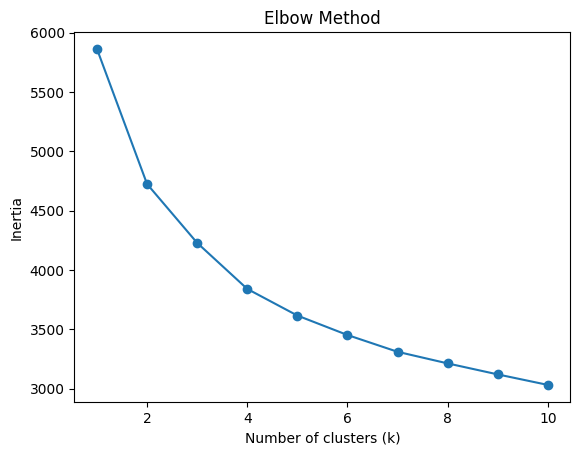

In [173]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [174]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df)


In [175]:
df

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Housing_free,Housing_own,Housing_rent,cluster
0,2.282879,1,2,0.0,0.0,-0.933992,-1.822056,False,False,False,False,False,True,False,False,False,True,False,3
1,-1.438777,0,2,0.0,1.0,1.163149,1.741206,False,False,False,False,False,True,False,False,False,True,False,1
2,1.227217,1,1,0.0,0.0,-0.181750,-0.688500,False,False,False,True,False,False,False,False,False,True,False,3
3,0.940950,1,2,0.0,0.0,1.525385,1.502020,False,False,False,False,True,False,False,False,True,False,False,1
4,1.491441,1,2,0.0,0.0,0.904761,0.508940,False,True,False,False,False,False,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.304984,0,1,0.0,0.0,-0.424565,-0.688500,False,False,False,False,True,False,False,False,False,True,False,2
996,0.545891,1,3,0.0,0.0,0.604188,0.902843,False,True,False,False,False,False,False,False,False,True,False,1
997,0.374195,1,2,0.0,0.0,-1.416038,-0.688500,False,False,False,False,False,True,False,False,False,True,False,3
998,-1.292660,1,2,0.0,0.0,-0.346103,1.625515,False,False,False,False,False,True,False,False,True,False,False,1


In [176]:
df["cluster"].value_counts()

cluster
2    334
1    322
3    243
0    101
Name: count, dtype: int64

In [177]:
df.groupby("cluster")[["Age", "Credit amount", "Duration"]].mean()


,Age,Credit amount,Duration
cluster,,,
0,0.029285,-0.299422,-0.193509
1,0.006121,1.008762,1.000118
2,-0.785540,-0.517548,-0.415948
3,1.059430,-0.500900,-0.673115


In [178]:
df_pres=pd.read_csv(r"C:\Users\zuz12\OneDrive\Desktop\pa project new\german_credit_data.csv")

In [179]:
df_pres=df_pres.drop("Unnamed: 0", axis=1)

In [180]:
ohe_col=["Purpose","Housing"]

In [181]:
df_pres["Sex"] = df_pres["Sex"].replace({
    "male": 1,
    "female": 0
})

C:\Users\zuz12\AppData\Local\Temp\ipykernel_19960\383910187.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_pres["Sex"] = df_pres["Sex"].replace({


In [182]:
df_pres["Checking account"] = df_pres["Checking account"].replace({
    "little": 0,
    "moderate": 1,
    "rich": 2
})


C:\Users\zuz12\AppData\Local\Temp\ipykernel_19960\243387663.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_pres["Checking account"] = df_pres["Checking account"].replace({


In [183]:
df_pres["Saving accounts"] = df_pres["Saving accounts"].replace({
    "little": 0,
    "moderate": 1,
    "quite rich": 2,
    "rich": 3
})


C:\Users\zuz12\AppData\Local\Temp\ipykernel_19960\859646867.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_pres["Saving accounts"] = df_pres["Saving accounts"].replace({


In [184]:
df_pres=pd.get_dummies(data=df_pres,columns=ohe_col)

In [185]:
df_pres[null_col]=imputer.fit_transform(df_pres[null_col])

In [187]:
df_pres["cluster"]=df["cluster"].astype(int)
df_pres.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Housing_free,Housing_own,Housing_rent,cluster
0,67,1,2,0.0,0.0,1169,6,False,False,False,False,False,True,False,False,False,True,False,3
1,22,0,2,0.0,1.0,5951,48,False,False,False,False,False,True,False,False,False,True,False,1
2,49,1,1,0.0,0.0,2096,12,False,False,False,True,False,False,False,False,False,True,False,3
3,45,1,2,0.0,0.0,7882,42,False,False,False,False,True,False,False,False,True,False,False,1
4,53,1,2,0.0,0.0,4870,24,False,True,False,False,False,False,False,False,True,False,False,1


# optimization model

In [201]:
import cvxpy as cp
import numpy as np

# ===============================
# 1) Data Preparation
# ===============================
# هنفترض إن عندك عمود ROI من الخطوات اللي فاتت
# لو مش عندك، كملي بـ 1/Duration زي ما إنتي
# returns = np.array(df_pres.groupby("cluster")["ROI"].mean()) 
# بس هنا هنكمل بالكود بتاعك عشان يشتغل علطول:
cluster_stats = df_pres.groupby("cluster")["Duration"].mean()
clusters = cluster_stats.index.tolist()
n = len(clusters)
returns = np.array([1 / cluster_stats[k] for k in clusters])

# ===============================
# 2) Optimization Variables
# ===============================
p = cp.Variable(n)   # النسب (Proportions)

# ===============================
# 3) Objective (Entropy-regularized)
# ===============================
# lambda: كل ما زادت، كل ما التوزيع بقى "أكثر عدالة" (Diversified)
# كل ما قلت، كل ما ركزنا الفلوس في الأفضل فقط
lambda_reg = 0.10  

objective = cp.Maximize(
    returns @ p + lambda_reg * cp.sum(cp.entr(p))
)

# ===============================
# 4) Constraints (The Upgrade)
# ===============================
constraints = [
    cp.sum(p) == 1,     # مجموع النسب 100%
    p >= 0.05,          # (جديد) كل جروب ياخد على الأقل 5% (Minimum Exposure)
    p <= 0.50           # (جديد) مفيش جروب ياخد أكتر من 50% (Risk Management)
]

# ===============================
# 5) Solve with Safety Check
# ===============================
problem = cp.Problem(objective, constraints)
try:
    problem.solve()
except Exception as e:
    print(f"Solver Error: {e}")

# ===============================
# 6) Allocation & Visualization
# ===============================
if problem.status == 'optimal':
    TOTAL_BUDGET = 10000000
    
    print(f"Status: Found Optimal Solution!")
    print("-" * 30)
    
    # عرض النتايج بشكل شيك
    for i, k in enumerate(clusters):
        amount = p.value[i] * TOTAL_BUDGET
        percent = p.value[i] * 100
        print(f"Cluster {k}: {percent:.1f}% -> ${amount:,.0f}")
        
    allocation = dict(zip(clusters, p.value * TOTAL_BUDGET))
else:
    print("Optimization failed or unbounded.")

Status: Found Optimal Solution!
------------------------------
Cluster 0: 24.5% -> $2,445,460
Cluster 1: 18.9% -> $1,887,327
Cluster 2: 27.1% -> $2,706,992
Cluster 3: 29.6% -> $2,960,220


# Simulation of a prescriptive analytics framework

In [202]:
N_SIM = 1000
profits = []

for _ in range(N_SIM):

    # Simulate uncertainty in returns (±20%)
    simulated_returns = returns * np.random.uniform(0.8, 1.2, size=n)

    # Compute total profit for this scenario
    profit = sum(
        simulated_returns[i] * allocation[clusters[i]]
        for i in range(n)
    )

    profits.append(profit)

# ----------------------------------
# 4) Simulation Results
# ----------------------------------

simulation_results = {
    "Average Profit": np.mean(profits),
    "Worst Case Profit": np.min(profits),
    "Best Case Profit": np.max(profits),
    "Std Deviation": np.std(profits)
}

print("\n=== Simulation Results ===")
simulation_results


=== Simulation Results ===


{'Average Profit': np.float64(592265.2301669345),
 'Worst Case Profit': np.float64(490866.3970012781),
 'Best Case Profit': np.float64(687469.1653852668),
 'Std Deviation': np.float64(36884.82435868502)}